# **Data Cleansing**

import beberapa library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

buat data frame kemudian load dataset nya

disini dataset yang digunakan adalah data Titanic.csv

In [2]:
df = pd.read_csv('Titanic.csv')

tampilkan dataset yang sudah di load

In [3]:
# melihat dari data teratas

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# melihat info data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Column Age

**Tampilkan visualisasi kolom nya**

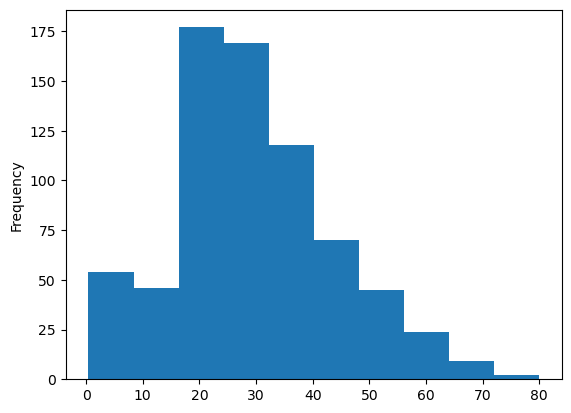

In [5]:
df.Age.plot(kind='hist');

karena column Age berdistribusi skewness

maka kita akan melakukan imputation pada column Age dengan mengunakan median

In [6]:
val = df.Age.median()
df['Age'] = df.Age.fillna(val)

tampilkan info dataset untuk meihat apakah kolom Age sudah terimputasi

Ternyata kolom Age sekarang sudah berubah jumlah nya

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Column Cabin

jumlah seluruh data entry adalah 891. sementara column Cabin berjumlah 204

artinya terdapat data null pada kolom Cabin

tampilkan proporsi data dari kolom Cabin

In [8]:
df.shape[0]

891

In [9]:
df['Cabin'].isna().sum()

687

In [10]:
df['Cabin'].isna().sum()/df.shape[0]

0.7710437710437711

In [11]:
df.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

terlihat bahwa value column Cabin terlalu banyak data unique nya

dan juga info kolom Cabil tidak terlalu informatif untuk mengetahui data Survived, maka kita akan hapus kolom Cabin

In [12]:
df.drop('Cabin', axis=1, inplace = True)

tampilkan info dataset untuk melihat apakah kolom Cabin sudah terhapus

In [13]:
#dan berhasil

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


# Column Embarked

jumlah seluruh data entry adalah 891. sementara kolom Embarked berjumlah 889

artinya terdapat data null pada kolom Embarked 

kita periksa di lokasi manakah data null tersebut

In [14]:
df.Embarked.isna().sum()

2

tampilkan proporsi dari data column Embarked

ternyata data column Embarked berupa data categoric

In [15]:
df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

bila kita akan melakukan imputation pada column Embarked, maka kita periksa type data column Embarked terlebih dahulu. 

data column Embarked berupa data categoric maka imputation nya menggunakan mode nya, dari proporsi column Embarked itu S adalah data yang paling sering muncul maka S adalah mode nya

In [16]:
val = df.Embarked.mode().values[0]
df['Embarked'] = df.Embarked.fillna(val)

setelah dilakukan imputation terlihat bahwa proporsi nya sudah berubah

In [17]:
#hasil di bawa harusnya
#S 646
#C 168
#Q  77

df.Embarked.value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

# Column SibSp dan Column Parch

**manipulasi disini bukan untuk mencari nilai data, tetapi untuk mempermudah data ini di baca**

Colum SibSp (Sibling Spouse) bermakna column yang menyatakan jumlah saudara atau jumlah pasangan yang dibawa oleh Pessenger

column Parch (Paret Children) bermakna kolom yang menyatakan jumlah orang tua atau jumlah anak yang di bawa oleh Pessenger

kita akan bikin column baru yang menampilkan apakah dia sendiri atau membawa keluarga

In [18]:
#binning

df['Alone']=df['SibSp']+df['Parch']

In [20]:
df['Alone'][df['Alone']>0]='With Family'
df['Alone'][df['Alone']==0]='without family'

C:\Users\Win 10\AppData\Local\Temp\ipykernel_11424\2201941281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Alone'][df['Alone']>0]='With Family'
C:\Users\Win 10\AppData\Local\Temp\ipykernel_11424\2201941281.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'With Family' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df['Alone'][df['Alone']>0]='With Family'


munculkan tampilan data terbaru

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,without family
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,without family


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Alone        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


# Hubungan antara Column Sex dan Column Survived

kita lihat proporsi Column Sex yang Survived

In [23]:
df.Sex[df['Survived']==1].value_counts()

Sex
female    233
male      109
Name: count, dtype: int64

tampilkan visualisasi Column Sex yang sudah Survived

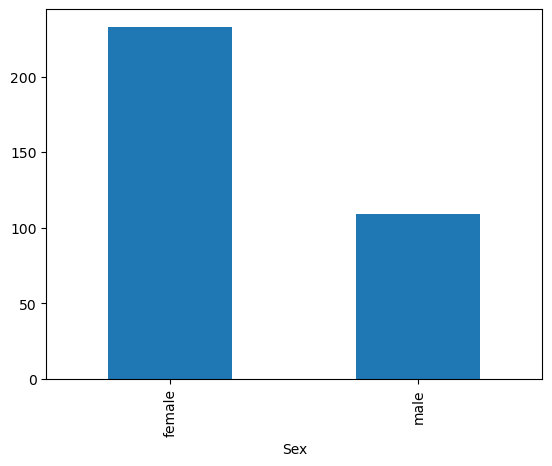

In [24]:
df.Sex[df['Survived']==1].value_counts().plot(kind='bar');

kita bandingkan kolom Sex yang tidak Survived

In [25]:
df.Sex[df['Survived']==1].value_counts()

Sex
female    233
male      109
Name: count, dtype: int64

tampilkan visualisasi Column Sex yang tidak Survived

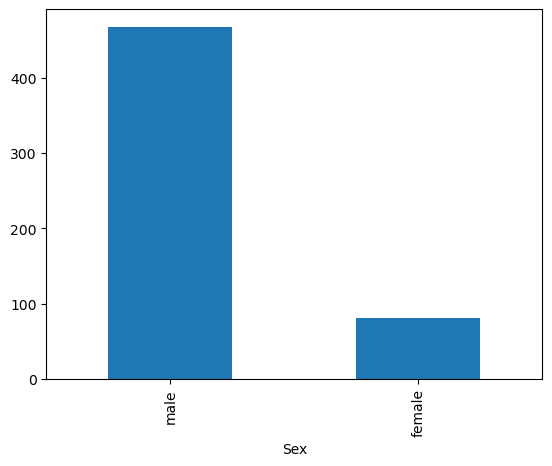

In [28]:
df.Sex[df['Survived']==0].value_counts().plot(kind='bar');

# Pivot Grafik

In [29]:
def make_pivot(param1, param2):
    df_slice = df[[param1, param2, 'PassengerId']]
    slice_pivot = df_slice.pivot_table(index=[param1], columns=[param2], \
                                        aggfunc=np.size,fill_value=0)
    p_chart = slice_pivot.plot(kind='bar');
    for p in p_chart.patches:
        p_chart.annotate(str(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.01))
        return slice_pivot
        return p_chart

# Pivot antara kolom Sex dan kolom Survived

PassengerId     
Sex           female male
Survived                 
0                 81  468
1                233  109

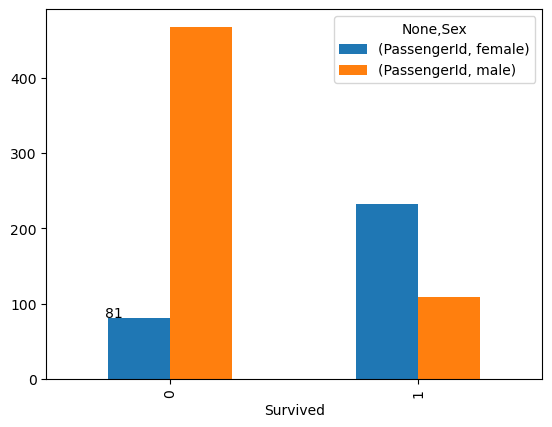

In [30]:
make_pivot('Survived', 'Sex')

**SEKIANNNN**